In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 设置显示所有的列
pd.options.display.max_columns = None

In [3]:
pwd

'D:\\Documents\\MyProjects\\DataAnalysis\\Kaggle\\House-price-regression-#1'

In [4]:
cd D:\\Documents\\MyProjects\\DataAnalysis\\Kaggle\\House-price-regression-#1\\data

D:\Documents\MyProjects\DataAnalysis\Kaggle\House-price-regression-#1\data


# 数据预处理

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
train.shape

(1460, 81)

In [7]:
test.shape

(1459, 80)

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## 缺失值处理

In [11]:
# 找出有哪些列含有缺失值
def col_contains_null(col):
    return any(pd.isnull(col))

In [12]:
col_null_train = train.apply(col_contains_null, axis = 0)

In [13]:
train_null = train.loc[:, col_null_train]
train_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

+ 对于 Alley , FireplaceQu, PoolQC, Fence, MiscFeature 这些列， 缺失的太多了，直接删除

In [14]:
train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
# 注意，这个操作对于 测试集也要进行
test.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [16]:
# 重新获取缺失值列
col_null_train = train.apply(col_contains_null, axis = 0)
train_null = train.loc[:, col_null_train]

In [17]:
# 对于测试集也是这样
col_null_test = test.apply(col_contains_null, axis = 0)
test_null = test.loc[:, col_null_test]

In [18]:
train_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


对于字符型和数值型的特征，采用不同的填充方式。  

**从一个DF中提取字符型的特征有两种方式**：
1. `df.loc[:, df.dtypes == np.object]`
2. `df.select_dtypes(include=['object'])`，这个是从0.14.1版本的pandas开始加入的

### 字符型特征缺失值填充
+ 对于字符类型的特征，采用众数填充

In [19]:
# 对于 Oject 类型的列，采用众数填充
from sklearn.impute import SimpleImputer
imp_most = SimpleImputer(strategy='most_frequent')

In [20]:
train_null_str = train_null.select_dtypes(include=['object'])
# train_null_str.info()

In [21]:
imp_most.fit(train_null_str)
train_null_str_impute = pd.DataFrame(imp_most.transform(train_null_str), columns = train_null_str.columns)
train_null_str_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MasVnrType    1460 non-null   object
 1   BsmtQual      1460 non-null   object
 2   BsmtCond      1460 non-null   object
 3   BsmtExposure  1460 non-null   object
 4   BsmtFinType1  1460 non-null   object
 5   BsmtFinType2  1460 non-null   object
 6   Electrical    1460 non-null   object
 7   GarageType    1460 non-null   object
 8   GarageFinish  1460 non-null   object
 9   GarageQual    1460 non-null   object
 10  GarageCond    1460 non-null   object
dtypes: object(11)
memory usage: 125.6+ KB


In [22]:
test_null_str = test_null.select_dtypes(include=['object'])
imp_most.fit(test_null_str)
test_null_str_impute = pd.DataFrame(imp_most.transform(test_null_str), columns = test_null_str.columns)
# test_null_str_impute.info()

### 数值型特征缺失值填充
+ 对于数值型的特征，采用均值进行填充

In [23]:
imp_mean = SimpleImputer(strategy='mean')

In [24]:
train_null_num = train_null.select_dtypes(exclude=['object'])
imp_mean.fit(train_null_num)
train_null_num_impute = pd.DataFrame(imp_mean.transform(train_null_num), columns = train_null_num.columns)
train_null_num_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   MasVnrArea   1460 non-null   float64
 2   GarageYrBlt  1460 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [25]:
test_null_num = test_null.select_dtypes(exclude=['object'])
imp_mean.fit(test_null_num)
test_null_num_impute = pd.DataFrame(imp_mean.transform(test_null_num), columns = test_null_num.columns)
# test_num_impute.info()

### 合并数据

In [26]:
# 含有缺失值的列
train_null_impute = pd.concat([train_null_str_impute, train_null_num_impute], axis = 1)
train_null_impute.shape

(1460, 14)

In [27]:
# 不含缺失值的列
# 这里使用了 取反 操作
train_not_null = train.loc[:,  ~ col_null_train]
train_not_null.shape

(1460, 62)

In [28]:
train_impute = pd.concat([train_null_impute, train_not_null], axis=1)
train_impute.shape

(1460, 76)

In [29]:
train.shape

(1460, 76)

In [30]:
# 调整一下列顺序
train_impute = train_impute[train.columns]

In [31]:
test_null_impute = pd.concat([test_null_str_impute, test_null_num_impute], axis = 1)
test_null_impute.shape

(1459, 28)

In [32]:
test_not_null = test.loc[:,  ~ col_null_test]
test_not_null.shape

(1459, 47)

In [33]:
test_impute = pd.concat([test_null_impute, test_not_null], axis=1)
test_impute.shape

(1459, 75)

In [34]:
test.shape

(1459, 75)

In [35]:
# 调整列顺序
test_impute = test_impute[test.columns]

## 特征处理

对类别特征进行处理

In [36]:
train_impute.shape

(1460, 76)

In [37]:
train_impute.info()
# train_impute.select_dtypes(include=['object']).info()
# train_impute.select_dtypes(include=['object']).iloc[:,:10].info()
# train_impute.select_dtypes(exclude=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

这里面的分类特征有的是分类有序变量，有的是分类标称变量，需要区别对待

In [38]:
# 已经删除的缺失值过多的变量
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


# 名义类别变量
cat_nominal = ['MSZoning',
#                'Alley',
               'Street','LotShape','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
               'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir',
               'Electrical','GarageType',
#                'MiscFeature',
               'SaleType']

# 有序类别变量
cat_ordinal = ['Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'BsmtFinType2','HeatingQC','KitchenQual','Functional',
#                'FireplaceQu',
               'GarageFinish','GarageQual','GarageCond','PavedDrive',
#                'PoolQC','Fence',
               'SaleCondition']

In [39]:
print("名义变量个数：",len(cat_nominal))
print("有序变量个数",len(cat_ordinal))
print("总计个数：", len(cat_nominal) + len(cat_ordinal))

名义变量个数： 21
有序变量个数 17
总计个数： 38


In [40]:
# 对于分类有序变量，需要自己定义变量里取值的顺序映射
Utilities = ['ELO','NoSeWa','NoSewr','AllPub']
LandSlope = ['Sev','Mod','Gtl']
ExterQual = ['Po','Fa','TA','Gd','Ex']
ExterCond = ['Po','Fa','TA','Gd','Ex']
BsmtQual = ['NA','Po','Fa','TA','Gd','Ex']
BsmtCond = ['NA','Po','Fa','TA','Gd','Ex']
BsmtExposure = ['NA','No','Mn','Av','Gd']
BsmtFinType1 = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
BsmtFinType2 = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
HeatingQC = ['Po','Fa','TA','Gd','Ex']
KitchenQual = ['Po','Fa','TA','Gd','Ex']
Functional = ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']
GarageFinish = ['NA','Unf','RFn','Fin']
GarageQual = ['NA','Po','Fa','TA','Gd','Ex']
GarageCond = ['NA','Po','Fa','TA','Gd','Ex']
PavedDrive = ['N','P','Y']
SaleCondition = ['Partial','Family','Alloca','AdjLand','Abnorml','Normal']

cat_ordinal_ls = [Utilities, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,
                  BsmtFinType2, HeatingQC, KitchenQual, Functional, GarageFinish, GarageQual, GarageCond, PavedDrive,
                  SaleCondition]

print('有序分类变量个数', len(cat_ordinal_ls))

有序分类变量个数 17


### 有序分类特征处理

In [41]:
train_ordinal = train_impute[cat_ordinal]
train_ordinal.shape

(1460, 17)

In [42]:
from sklearn.preprocessing import OrdinalEncoder
enc_ordinal = OrdinalEncoder(categories=cat_ordinal_ls)
enc_ordinal.fit(train_ordinal)

OrdinalEncoder(categories=[['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
                           ['Sev', 'Mod', 'Gtl'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['NA', 'No', 'Mn', 'Av', 'Gd'],
                           ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                           ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1',
                            'Typ'],
                           ['NA', 'Unf', 'RFn', 'Fin'],
                           ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
  

In [43]:
train_ordinal_enc = pd.DataFrame(enc_ordinal.transform(train_ordinal), columns=train_ordinal.columns)

In [44]:
train_ordinal_enc.head()

,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition
0,3.0,2.0,3.0,2.0,4.0,3.0,1.0,6.0,1.0,4.0,3.0,7.0,2.0,3.0,3.0,2.0,5.0
1,3.0,2.0,2.0,2.0,4.0,3.0,4.0,5.0,1.0,4.0,2.0,7.0,2.0,3.0,3.0,2.0,5.0
2,3.0,2.0,3.0,2.0,4.0,3.0,2.0,6.0,1.0,4.0,3.0,7.0,2.0,3.0,3.0,2.0,5.0
3,3.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,3.0,3.0,7.0,1.0,3.0,3.0,2.0,4.0
4,3.0,2.0,3.0,2.0,4.0,3.0,3.0,6.0,1.0,4.0,3.0,7.0,2.0,3.0,3.0,2.0,5.0


In [45]:
train_ordinal.head()

,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition
0,AllPub,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,Typ,RFn,TA,TA,Y,Normal
1,AllPub,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,Typ,RFn,TA,TA,Y,Normal
2,AllPub,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,Typ,RFn,TA,TA,Y,Normal
3,AllPub,Gtl,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Typ,Unf,TA,TA,Y,Abnorml
4,AllPub,Gtl,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,Typ,RFn,TA,TA,Y,Normal


In [46]:
test_ordinal = test_impute[cat_ordinal]
test_ordinal_enc = pd.DataFrame(enc_ordinal.transform(test_ordinal), columns=test_ordinal.columns)

In [47]:
test_ordinal.head()

,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition
0,AllPub,Gtl,TA,TA,TA,TA,No,Rec,LwQ,TA,TA,Typ,Unf,TA,TA,Y,Normal
1,AllPub,Gtl,TA,TA,TA,TA,No,ALQ,Unf,TA,Gd,Typ,Unf,TA,TA,Y,Normal
2,AllPub,Gtl,TA,TA,Gd,TA,No,GLQ,Unf,Gd,TA,Typ,Fin,TA,TA,Y,Normal
3,AllPub,Gtl,TA,TA,TA,TA,No,GLQ,Unf,Ex,Gd,Typ,Fin,TA,TA,Y,Normal
4,AllPub,Gtl,Gd,TA,Gd,TA,No,ALQ,Unf,Ex,Gd,Typ,RFn,TA,TA,Y,Normal


In [48]:
test_ordinal_enc.head()

,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition
0,3.0,2.0,2.0,2.0,3.0,3.0,1.0,3.0,2.0,2.0,2.0,7.0,1.0,3.0,3.0,2.0,5.0
1,3.0,2.0,2.0,2.0,3.0,3.0,1.0,5.0,1.0,2.0,3.0,7.0,1.0,3.0,3.0,2.0,5.0
2,3.0,2.0,2.0,2.0,4.0,3.0,1.0,6.0,1.0,3.0,2.0,7.0,3.0,3.0,3.0,2.0,5.0
3,3.0,2.0,2.0,2.0,3.0,3.0,1.0,6.0,1.0,4.0,3.0,7.0,3.0,3.0,3.0,2.0,5.0
4,3.0,2.0,3.0,2.0,4.0,3.0,1.0,5.0,1.0,4.0,3.0,7.0,2.0,3.0,3.0,2.0,5.0


### 名义分类特征处理

In [49]:
train_nonimal = train_impute[cat_nominal]
train_nonimal.shape

(1460, 21)

In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
enc_onehot = OneHotEncoder(drop='if_binary', sparse=False)
enc_onehot.fit(train_nonimal)

OneHotEncoder(drop='if_binary', sparse=False)

In [52]:
enc_onehot.get_feature_names(train_nonimal.columns)

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       

In [53]:
train_nonimal_enc = pd.DataFrame(enc_onehot.transform(train_nonimal), columns=enc_onehot.get_feature_names(train_nonimal.columns))

In [54]:
train_nonimal_enc.shape

(1460, 156)

In [55]:
train_nonimal_enc.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.

In [56]:
train_nonimal.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,SaleType
0,RL,Pave,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,WD
1,RL,Pave,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,WD
2,RL,Pave,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,WD
3,RL,Pave,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Detchd,WD
4,RL,Pave,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,WD


In [57]:
test_nonimal = test_impute[cat_nominal]
test_nonimal_enc = pd.DataFrame(enc_onehot.transform(test_nonimal), columns=enc_onehot.get_feature_names(train_nonimal.columns))

In [58]:
test_nonimal.shape

(1459, 21)

In [59]:
test_nonimal_enc.shape

(1459, 156)

In [60]:
test_nonimal_enc.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.

In [61]:
test_nonimal.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,SaleType
0,RH,Pave,Reg,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,SBrkr,Attchd,WD
1,RL,Pave,IR1,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,GasA,Y,SBrkr,Attchd,WD
2,RL,Pave,IR1,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,SBrkr,Attchd,WD
3,RL,Pave,IR1,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,WD
4,RL,Pave,IR1,HLS,Inside,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,PConc,GasA,Y,SBrkr,Attchd,WD


### 合并数据

In [62]:
train_cat = pd.concat([train_ordinal_enc, train_nonimal_enc], axis=1)

In [63]:
train_cat.shape

(1460, 173)

In [64]:
train_num = train_impute.select_dtypes(exclude=['object'])

In [65]:
train_num.shape

(1460, 38)

In [66]:
train_df = pd.concat([train_num, train_cat], axis=1)

In [67]:
train_df.shape

(1460, 211)

In [68]:
test_cat = pd.concat([test_ordinal_enc, test_nonimal_enc], axis=1)
test_num = test_impute.select_dtypes(exclude=['object'])
test_df = pd.concat([test_num, test_cat], axis=1)

In [69]:
test_df.shape

(1459, 210)

# 建模

先从训练数据中分离出特征和目标变量，测试数据中没有目标变量；  
还需要注意的是，数据中还含有一列ID列

In [70]:
train_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'GarageType_Detchd', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=211)

In [71]:
X = train_df.drop(['SalePrice'], axis=1).set_index('Id')

In [72]:
y = train_df['SalePrice']

In [73]:
X.shape

(1460, 209)

划分测试集和训练集（训练+验证）

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=29)

In [131]:
X_train.shape

(1022, 209)

In [132]:
X_test.shape

(438, 209)

待预测的数据

In [133]:
test_df = test_df.set_index('Id')

KeyError: "None of ['Id'] are in the columns"

In [134]:
test_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,3.0,2.0,2.0,2.0,3.0,3.0,1.0,3.0,2.0,2.0,2.0,7.0,1.0,3.0,3.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0

## XGBoost模型

In [135]:
import xgboost as xgb

In [136]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

In [137]:
dtrain.__class__

xgboost.core.DMatrix

In [138]:
dtrain.num_row()

1022

In [139]:
dtest.num_row()

438

+ 默认参数

In [144]:
# 配置XGB模型参数
params = {
    'booster':'gbtree',
#     'objective': 'reg:squarederror',
    'objective': 'reg:squaredlogerror',
    'eta': 0.3,
    'gamma': 0,
    'max_depth': 6,
    'lambda': 1,
    'alpha': 0,
    'subsample': 1,
    'tree_method': 'auto',
    'base_score': 0.5,
    'eval_metric':['rmsle']
#     ,'verbosity': 0
}

num_round = 50

watch_list = [(dtrain,'train'),(dtest, 'test')]
# watch_list = [(dtest, 'test')]
# watch_list = [(dtrain, 'test')]

In [158]:
bst = xgb.train(params=params, dtrain=dtrain,  num_boost_round=num_round, evals=watch_list
                , verbose_eval=False
               )

In [159]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_log_error as MSLE

In [160]:
y_pred = bst.predict(dtrain)

In [153]:
MSE(y_train, y_pred)**(1/2)

200622.84589157213

In [154]:
MSLE(y_train, y_pred)**(1/2)

6.218444635223376

+ 调参

先用XGB自带的CV选择最佳的num_round

In [161]:
num_round = 200
nfold = 2
history = xgb.cv(params=params, dtrain=dtrain, num_boost_round=num_round, nfold=nfold)

In [162]:
history.shape

(200, 4)

In [163]:
history.head(10)

,train-rmsle-mean,train-rmsle-std,test-rmsle-mean,test-rmsle-std
0,11.398081,0.006975,11.398080,0.006995
1,11.154791,0.006960,11.154791,0.007003
2,10.911971,0.006946,10.911971,0.007010
3,10.669690,0.006928,10.669689,0.007019
4,10.428048,0.006912,10.428050,0.007027
5,10.187214,0.006895,10.187214,0.007035
6,9.947438,0.006876,9.947439,0.007046
7,9.709124,0.006856,9.709122,0.007056
8,9.472899,0.006836,9.472899,0.007067
9,9.239746,0.006813,9.239746,0.007079


In [164]:
history['num_round'] = np.arange(1,201)

train_info = history.loc[:, ['num_round','train-rmsle-mean','train-rmsle-std']]
test_info = history.loc[:, ['num_round','test-rmsle-mean','test-rmsle-std']]

train_info.columns = ['num_round','rmsle-mean','rmsle-std']
test_info.columns = ['num_round','rmsle-mean','rmsle-std']
train_info['type'] = 'train'
test_info['type'] = 'test'

history_info = pd.concat([train_info, test_info], axis = 0)

In [165]:
history_info.shape

(400, 4)

In [166]:
# history_info.head()
history_info[history_info['type']=='test'].head()

,num_round,rmsle-mean,rmsle-std,type
0,1,11.398080,0.006995,test
1,2,11.154791,0.007003,test
2,3,10.911971,0.007010,test
3,4,10.669689,0.007019,test
4,5,10.428050,0.007027,test


In [167]:
import plotly.express as px

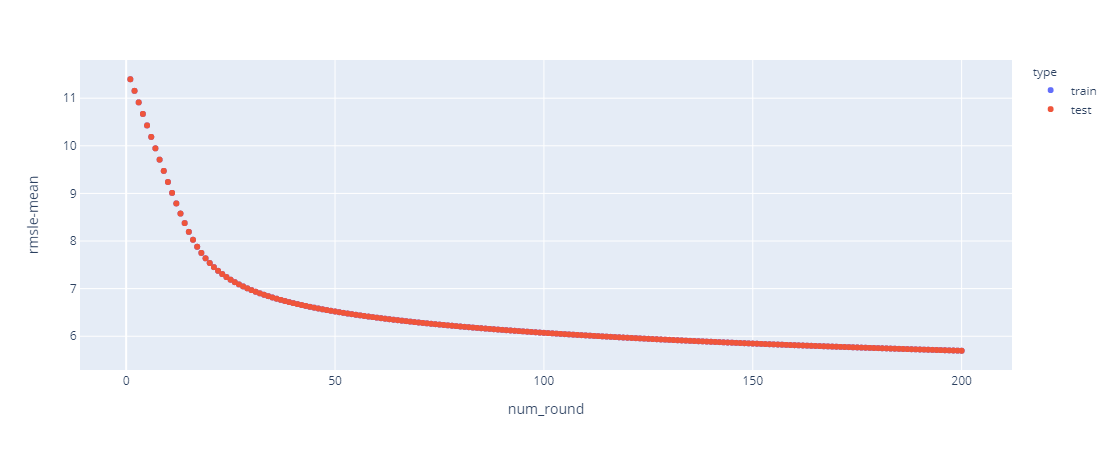

In [168]:
px.scatter(data_frame=history_info, x='num_round', y='rmsle-mean', color='type')

使用sklearn接口

In [198]:
from xgboost import XGBRegressor as XGBR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [197]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())
cv_result = cross_val_score(XGBR(n_estimators=9, booster='gbtree', objective='reg:squaredlogerror'),
                            X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_log_error')
(- cv_result)**(1/2)

array([9.45077058, 9.42071261, 9.51693453, 9.46804733, 9.48876588])

In [204]:
n_estimators_grid = {'n_estimators': np.arange(50,201,10)}
grid_search = GridSearchCV(XGBR(), param_grid=n_estimators_grid, scoring='neg_mean_squared_log_error', cv=5)

In [205]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [206]:
cv_results = grid_search.cv_results_

In [208]:
cv_results

{'mean_fit_time': array([0.09879937, 0.1057992 , 0.13300056, 0.13800006, 0.15680037,
        0.17219987, 0.18579988, 0.20620036, 0.22600021, 0.23179975,
        0.26239972, 0.28139992, 0.29419966, 0.29180036, 0.31219931,
        0.32280011]),
 'std_fit_time': array([0.00611272, 0.00074846, 0.01852608, 0.0036334 , 0.0060458 ,
        0.00591176, 0.00470721, 0.00910871, 0.0089888 , 0.00574064,
        0.01426336, 0.02166544, 0.01334747, 0.0034869 , 0.01121413,
        0.00453442]),
 'mean_score_time': array([0.0102005 , 0.00980153, 0.00980077, 0.01000037, 0.01020126,
        0.01000051, 0.01020103, 0.01020017, 0.01020026, 0.01040134,
        0.01020122, 0.01000142, 0.00980153, 0.01000118, 0.01000094,
        0.0098    ]),
 'std_score_time': array([4.00185880e-04, 3.99661416e-04, 4.00352847e-04, 1.68991519e-06,
        4.00519978e-04, 8.97163759e-07, 4.00162255e-04, 4.00114187e-04,
        3.99829279e-04, 7.99728128e-04, 3.99471621e-04, 6.31882555e-04,
        4.00853877e-04, 1.29713731e-

+ 预测

In [206]:
test_dmatrix = xgb.DMatrix(test_df)
test_df_y = bst.predict(test_dmatrix)
y = pd.DataFrame(test_df_y, index=test_df.index, columns=['SalePrice'])

In [217]:
y.head()

,SalePrice
Id,
1461,121758.382812
1462,157941.156250
1463,190274.671875
1464,193406.859375
1465,191539.984375


In [218]:
y.to_csv('test_y_predict.csv')